# Intel Image Classification (CNN - Keras)
Hello, I hope you are having a great day.

In this notebook, I will try the process of implementing CNN with Keras in order to classify images.

1. Firstly, we'll import usefull packages.
2. Then, we'll load the data, before visualize and preprocess it.
3. We'll try a simple CNN model and then we will evaluate its performances.
4. We will then use pre trained model to address this challenge aswell.

# Import Packages¶


In [5]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [6]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [7]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train', 'seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [19]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading seg_train


100%|██████████| 2382/2382 [00:01<00:00, 1847.16it/s]


Loading seg_test


100%|██████████| 501/501 [00:00<00:00, 1477.48it/s]


In [20]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)


# Let's explore the dataset
We can ask ourselves:

* How many training and testing examples do we have ?
* What is the size of the images ?
* What is the proportion of each observed category ?

In [21]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


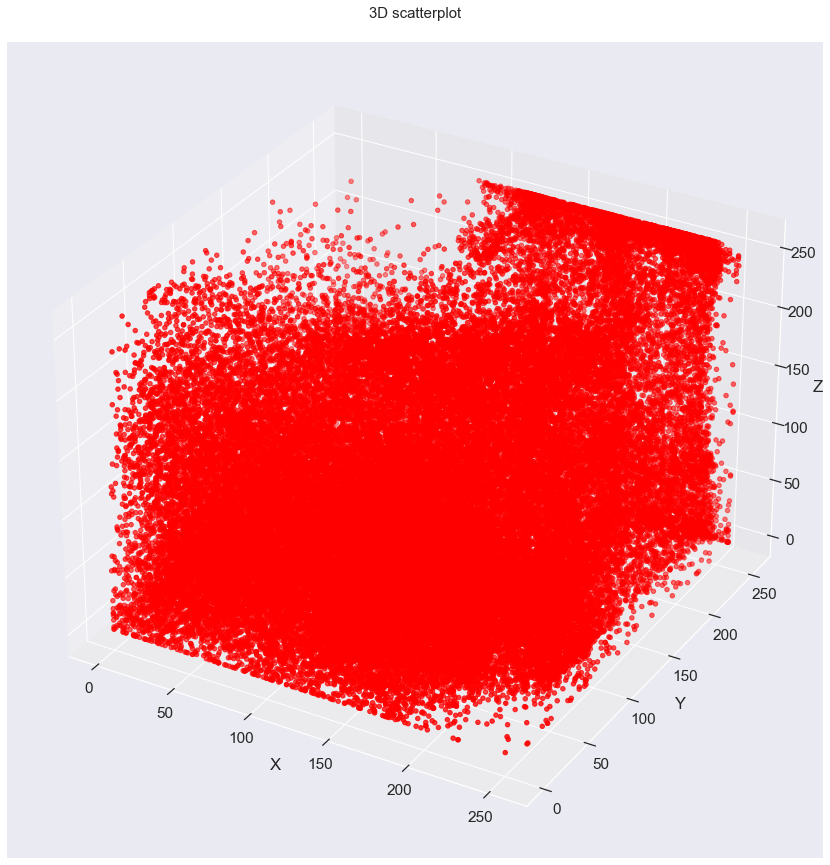

In [22]:
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')

ax.scatter3D(train_images[0],train_images[1],train_images[2],color='red')
ax.set_title("3D scatterplot", pad=25, size=15)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

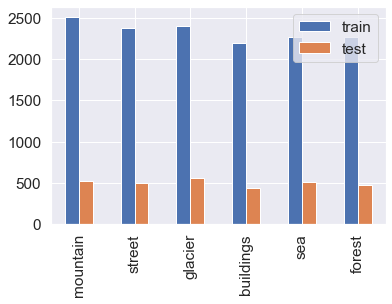

In [23]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

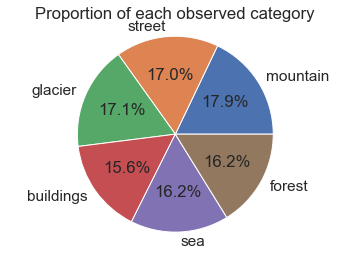

In [24]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

Good practice: scale the data¶


In [25]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Visualize the data
We can display a random image from the training set.

In [26]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

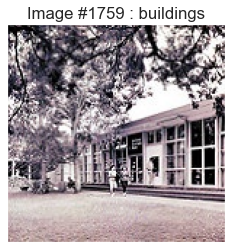

In [27]:
display_random_image(class_names, train_images, train_labels)


We can also display the first 25 images from the training set directly with a loop to get a better view


In [28]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

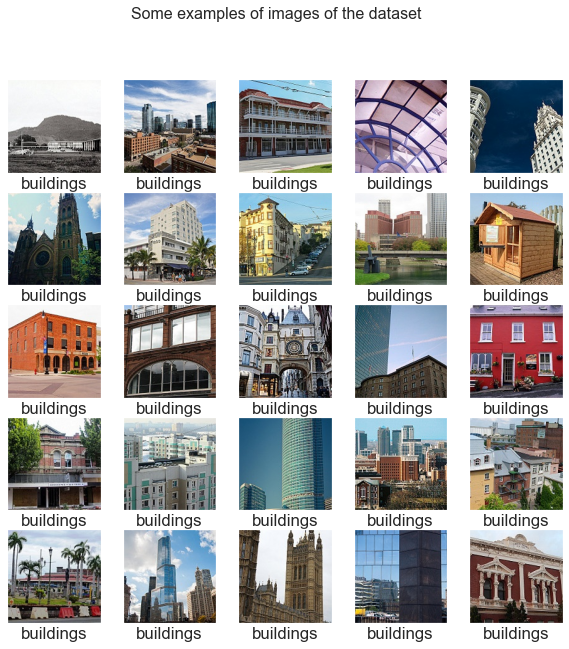

In [17]:
display_examples(class_names, train_images, train_labels)


# Building our model


In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [30]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 126s 1s/step - loss: 1.2122 - accuracy: 0.5578 - val_loss: 0.8131 - val_accuracy: 0.7072
Epoch 2/20
88/88 [==============================] - 140s 2s/step - loss: 0.7257 - accuracy: 0.7407 - val_loss: 0.6916 - val_accuracy: 0.7581
Epoch 3/20
88/88 [==============================] - 139s 2s/step - loss: 0.5534 - accuracy: 0.8069 - val_loss: 0.6933 - val_accuracy: 0.7602
Epoch 4/20
88/88 [==============================] - 131s 1s/step - loss: 0.4363 - accuracy: 0.8500 - val_loss: 0.6692 - val_accuracy: 0.7688
Epoch 5/20
88/88 [==============================] - 140s 2s/step - loss: 0.3260 - accuracy: 0.8939 - val_loss: 0.7103 - val_accuracy: 0.7613
Epoch 6/20
88/88 [==============================] - 134s 2s/step - loss: 0.2388 - accuracy: 0.9249 - val_loss: 0.6889 - val_accuracy: 0.7766
Epoch 7/20
88/88 [==============================] - 137s 2s/step - loss: 0.1755 - accuracy: 0.9484 - val_loss: 0.8118 - val_accuracy: 0.7492
Epoch 8/20
88

In [33]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

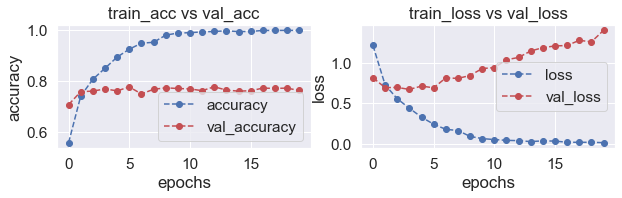

In [34]:
plot_accuracy_loss(history)


We should evaluate the model performance on test set



In [35]:
test_loss = model.evaluate(test_images, test_labels)


94/94 [==============================] - 8s 84ms/step - loss: 1.3355 - accuracy: 0.7577


We see that we achieve 0.76 accuracy on the testing test. We got a slight underfitting :(

Let's see how the classifier is doing on random images.

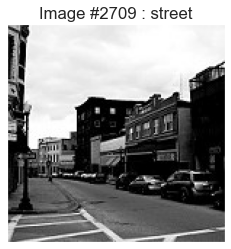

In [36]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

# Error analysis
We can try to understand on which kind of images the classifier has trouble.

In [37]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

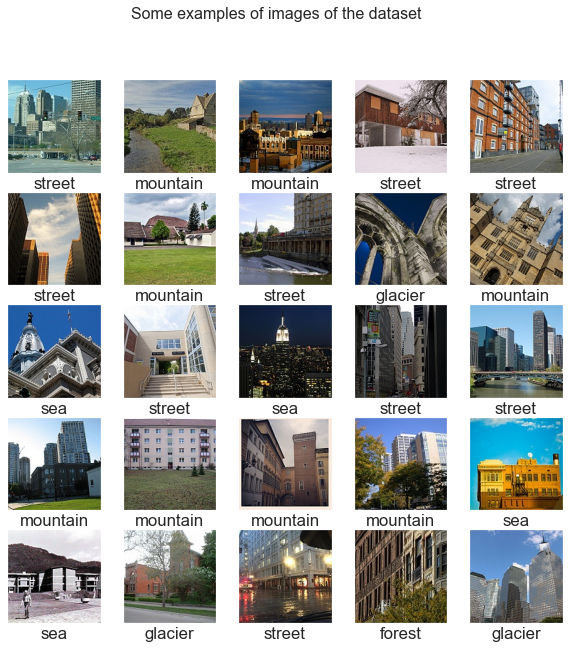

In [38]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

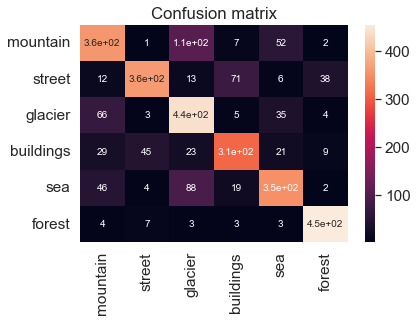

In [39]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Conclusion: The classifier has trouble with 2 kinds of images.
It has trouble with street and buildings. Well, it can be understandable as as there are buildings in the street. It has also trouble with sea, glacier and moutain as well. It is hard for me to fully distinguish them. However, it can detects forest very accurately!

So we will do Feature extraction with VGG ImageNet



In [40]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

Get the features directly from VGG16

In [42]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

* Visualize the features through PCA

In [43]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [44]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) 
C1 = C[:,0]
C2 = C[:,1]

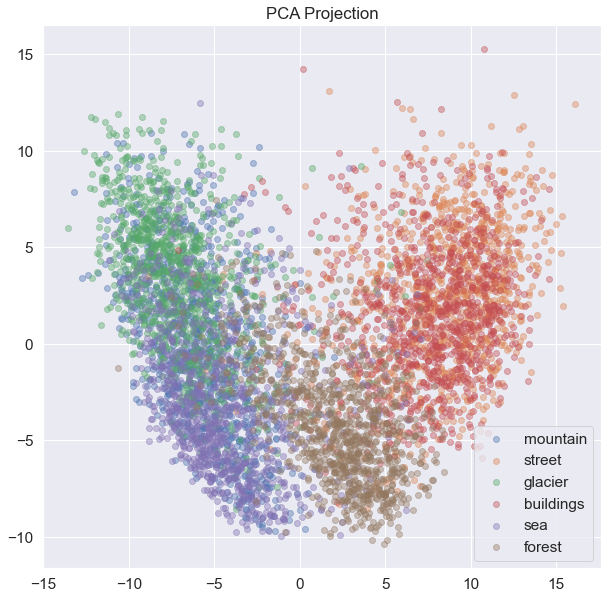

In [45]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

# Training on top of VGG
Let's train a simple one-layer Neural Network on the features extracted from VGG

In [46]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
88/88 [==============================] - 1s 8ms/step - loss: 0.5363 - accuracy: 0.8031 - val_loss: 0.3579 - val_accuracy: 0.8660
Epoch 2/15
88/88 [==============================] - 1s 8ms/step - loss: 0.3059 - accuracy: 0.8938 - val_loss: 0.3342 - val_accuracy: 0.8735
Epoch 3/15
88/88 [==============================] - 1s 7ms/step - loss: 0.2401 - accuracy: 0.9181 - val_loss: 0.3308 - val_accuracy: 0.8771
Epoch 4/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1885 - accuracy: 0.9376 - val_loss: 0.3201 - val_accuracy: 0.8849
Epoch 5/15
88/88 [==============================] - 1s 8ms/step - loss: 0.1668 - accuracy: 0.9442 - val_loss: 0.3289 - val_accuracy: 0.8785
Epoch 6/15
88/88 [==============================] - 1s 8ms/step - loss: 0.1311 - accuracy: 0.9595 - val_loss: 0.3664 - val_accuracy: 0.8753
Epoch 7/15
88/88 [==============================] - 1s 8ms/step - loss: 0.1191 - accuracy: 0.9614 - val_loss: 0.3362 - val_accuracy: 0.8864
Epoch 8/15
88/88 [==

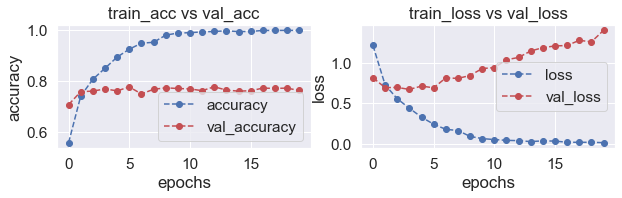

In [47]:
plot_accuracy_loss(history)


We should get approximately 0.844 accuracy (+0.1 accuracy) over the simple ConvNet.



In [48]:
test_loss = model2.evaluate(test_features, test_labels)


94/94 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8773


# Ensemble Neural Networks


In [49]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [50]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [51]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
79/79 [==============================] - 1s 9ms/step - loss: 0.4830 - accuracy: 0.8195 - val_loss: 0.2777 - val_accuracy: 0.9056
Epoch 2/10
79/79 [==============================] - 1s 7ms/step - loss: 0.2313 - accuracy: 0.9189 - val_loss: 0.2583 - val_accuracy: 0.9127
Epoch 3/10
79/79 [==============================] - 1s 9ms/step - loss: 0.1877 - accuracy: 0.9345 - val_loss: 0.1976 - val_accuracy: 0.9368
Epoch 4/10
79/79 [==============================] - 1s 7ms/step - loss: 0.1305 - accuracy: 0.9569 - val_loss: 0.2052 - val_accuracy: 0.9314
Epoch 5/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0921 - accuracy: 0.9758 - val_loss: 0.1989 - val_accuracy: 0.9243
Epoch 6/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0718 - accuracy: 0.9825 - val_loss: 0.1851 - val_accuracy: 0.9421
Epoch 7/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0562 - accuracy: 0.9862 - val_loss: 0.1963 - val_accuracy: 0.9341
Epoch 8/10
79/79 [==

In [52]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8893333333333333


# Fine tuning VGG ImageNet

In [54]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [55]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [56]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [57]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
new_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0   

In [59]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
88/88 [==============================] - 275s 3s/step - loss: 0.6336 - accuracy: 0.7489 - val_loss: 0.3922 - val_accuracy: 0.8693
Epoch 2/10
88/88 [==============================] - 266s 3s/step - loss: 0.3217 - accuracy: 0.8924 - val_loss: 0.3041 - val_accuracy: 0.8956
Epoch 3/10
88/88 [==============================] - 282s 3s/step - loss: 0.2599 - accuracy: 0.9100 - val_loss: 0.2477 - val_accuracy: 0.9109
Epoch 4/10
88/88 [==============================] - 255s 3s/step - loss: 0.1966 - accuracy: 0.9316 - val_loss: 0.3328 - val_accuracy: 0.8899
Epoch 5/10
88/88 [==============================] - 248s 3s/step - loss: 0.1826 - accuracy: 0.9365 - val_loss: 0.2872 - val_accuracy: 0.8935
Epoch 6/10
88/88 [==============================] - 260s 3s/step - loss: 0.1359 - accuracy: 0.9542 - val_loss: 0.2957 - val_accuracy: 0.9081
Epoch 7/10
88/88 [==============================] - 257s 3s/step - loss: 0.1240 - accuracy: 0.9570 - val_loss: 0.2616 - val_accuracy: 0.9099
Epoch 8/10
88

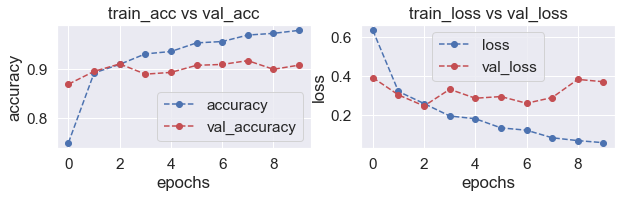

In [60]:
plot_accuracy_loss(history)

In [61]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8993333333333333
